# Data Analysis and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from dateutil import parser
from pandas import Series
from math import ceil

In [27]:
df = pd.read_csv('test_table_5.csv', encoding="utf-8")
vg_df = df
vg_df = vg_df.copy()
vg_df.head()

,title,platform,release-date,score,user_score,developer,genre,critics,users,franchise,global_sales
0,.hack//G.U. Last Recode,PlayStation4,3-Nov-17,76,8.1,CyberConnect2,"Miscellaneous,Compilation",21,64,hack,0.47
1,.hack//G.U. Last Recode,PC,3-Nov-17,69,8.0,CyberConnect2,"Miscellaneous,Compilation",7,25,hack,NaN
2,#IDARB,XboxOne,30-Jan-15,77,6.9,OtherOceanInteractive,"Action,General",31,88,#IDARB,0.09
3,007: Quantum of Solace,PlayStation3,4-Nov-08,65,6.6,Treyarch,"Action,General,Shooter,Shooter,First-Person,Mo...",42,59,007: Quantum of Solace,1.14
4,007: Quantum of Solace,PC,4-Nov-08,70,6.1,"Treyarch,Beenox","Action,General,Shooter,Shooter,First-Person,Mo...",18,64,007: Quantum of Solace,0.03


In [28]:
vg_df.dtypes

title            object
platform         object
release-date     object
score             int64
user_score      float64
developer        object
genre            object
critics           int64
users             int64
franchise        object
global_sales    float64
dtype: object

In [29]:
vg_df.dropna()

,title,platform,release-date,score,user_score,developer,genre,critics,users,franchise,global_sales
0,.hack//G.U. Last Recode,PlayStation4,3-Nov-17,76,8.1,CyberConnect2,"Miscellaneous,Compilation",21,64,hack,0.47
2,#IDARB,XboxOne,30-Jan-15,77,6.9,OtherOceanInteractive,"Action,General",31,88,#IDARB,0.09
3,007: Quantum of Solace,PlayStation3,4-Nov-08,65,6.6,Treyarch,"Action,General,Shooter,Shooter,First-Person,Mo...",42,59,007: Quantum of Solace,1.14
4,007: Quantum of Solace,PC,4-Nov-08,70,6.1,"Treyarch,Beenox","Action,General,Shooter,Shooter,First-Person,Mo...",18,64,007: Quantum of Solace,0.03
6,10 Second Ninja,PC,5-Mar-14,72,7.1,GameDesignDan,"Action,Platformer,2D",13,16,10 Second Ninja,0.02
...,...,...,...,...,...,...,...,...,...,...,...
7327,Yakuza 4,PlayStation3,15-Mar-11,78,8.4,RyugaGotokuStudios,"Action Adventure,Modern,Modern,Open-World",59,232,Yakuza,0.95
7329,Yakuza 5,PlayStation3,8-Dec-15,83,8.6,RyugaGotokuStudios,"Modern,Action Adventure,Open-World",34,251,Yakuza,0.59
7332,Yakuza Kiwami,PlayStation4,29-Aug-17,80,7.9,RyugaGotokuStudios,"Action Adventure,Open-World",70,477,Yakuza,0.16
7361,You Don't Know Jack,PlayStation3,8-Feb-11,82,8.2,"Jellyvision,IronGalaxyStudios","Miscellaneous,Trivia / Game Show,Trivia / Game...",11,17,You Don't Know Jack,0.18


# Data Cleaning

In [5]:
# # Convert string date to datetime format
# vg_df['year_of_release'] = pd.to_datetime(vg_df['release-date'], format='%d-%b-%y')
# print(vg_df)

In [6]:
len(vg_df['genre'])

7415

In [30]:
# splitting genre column
genre = vg_df['genre'].str.split(',', n=1, expand=True)
genre.head(15)

,0,1
0,Miscellaneous,Compilation
1,Miscellaneous,Compilation
2,Action,General
3,Action,"General,Shooter,Shooter,First-Person,Modern,Mo..."
4,Action,"General,Shooter,Shooter,First-Person,Modern,Mo..."
5,Miscellaneous,"Puzzle,Action"
6,Action,"Platformer,2D"
7,Action,"Platformer,2D"
8,Action,"Platformer,2D"
9,Action,"Platformer,Platformer,2D,2D"


In [31]:
genre.columns = ["primary_genre", "other"]
genre.head()

,primary_genre,other
0,Miscellaneous,Compilation
1,Miscellaneous,Compilation
2,Action,General
3,Action,"General,Shooter,Shooter,First-Person,Modern,Mo..."
4,Action,"General,Shooter,Shooter,First-Person,Modern,Mo..."


In [32]:
vg_df = vg_df.join(genre, lsuffix='genre', rsuffix= 'primary_genre')

In [33]:
cols = list(vg_df.columns.values)
cols

['title',
 'platform',
 'release-date',
 'score',
 'user_score',
 'developer',
 'genre',
 'critics',
 'users',
 'franchise',
 'global_sales',
 'primary_genre',
 'other']

In [34]:
vg_df.drop(['other'], axis =1)

,title,platform,release-date,score,user_score,developer,genre,critics,users,franchise,global_sales,primary_genre
0,.hack//G.U. Last Recode,PlayStation4,3-Nov-17,76,8.1,CyberConnect2,"Miscellaneous,Compilation",21,64,hack,0.47,Miscellaneous
1,.hack//G.U. Last Recode,PC,3-Nov-17,69,8.0,CyberConnect2,"Miscellaneous,Compilation",7,25,hack,NaN,Miscellaneous
2,#IDARB,XboxOne,30-Jan-15,77,6.9,OtherOceanInteractive,"Action,General",31,88,#IDARB,0.09,Action
3,007: Quantum of Solace,PlayStation3,4-Nov-08,65,6.6,Treyarch,"Action,General,Shooter,Shooter,First-Person,Mo...",42,59,007: Quantum of Solace,1.14,Action
4,007: Quantum of Solace,PC,4-Nov-08,70,6.1,"Treyarch,Beenox","Action,General,Shooter,Shooter,First-Person,Mo...",18,64,007: Quantum of Solace,0.03,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
7410,Zoo Tycoon 2,PC,11-Nov-04,72,7.9,BlueFangGames,"Strategy,Tycoon,Management,Tycoon,Business / T...",34,63,Zoo Tycoon,0.06,Strategy
7411,Zoo Tycoon: Dinosaur Digs,PC,19-May-02,67,7.2,BlueFangGames,"Strategy,Tycoon,Management,Tycoon,Business / T...",9,9,Zoo Tycoon,NaN,Strategy
7412,Zoo Tycoon: Marine Mania,PC,21-Oct-02,71,7.5,BlueFangGames,"Strategy,Tycoon,Management,Tycoon,Business / T...",8,12,Zoo Tycoon,NaN,Strategy
7413,Zuma's Revenge!,PC,15-Sep-09,78,7.5,PopCap,"Miscellaneous,Puzzle,Action,Puzzle,Puzzle,Action",17,46,Zuma,NaN,Miscellaneous


In [35]:
vg_df = vg_df[['title','platform','release-date', 'score', 'user_score', 'developer', 'genre', 'primary_genre', 'critics', 'users', 'franchise', 'global_sales']]

vg_df.head()

,title,platform,release-date,score,user_score,developer,genre,primary_genre,critics,users,franchise,global_sales
0,.hack//G.U. Last Recode,PlayStation4,3-Nov-17,76,8.1,CyberConnect2,"Miscellaneous,Compilation",Miscellaneous,21,64,hack,0.47
1,.hack//G.U. Last Recode,PC,3-Nov-17,69,8.0,CyberConnect2,"Miscellaneous,Compilation",Miscellaneous,7,25,hack,NaN
2,#IDARB,XboxOne,30-Jan-15,77,6.9,OtherOceanInteractive,"Action,General",Action,31,88,#IDARB,0.09
3,007: Quantum of Solace,PlayStation3,4-Nov-08,65,6.6,Treyarch,"Action,General,Shooter,Shooter,First-Person,Mo...",Action,42,59,007: Quantum of Solace,1.14
4,007: Quantum of Solace,PC,4-Nov-08,70,6.1,"Treyarch,Beenox","Action,General,Shooter,Shooter,First-Person,Mo...",Action,18,64,007: Quantum of Solace,0.03


In [38]:
vg_df.columns

Index(['title', 'platform', 'release-date', 'score', 'user_score', 'developer',
       'genre', 'primary_genre', 'critics', 'users', 'franchise',
       'global_sales'],
      dtype='object')

In [48]:
vg_df.get('primary_genre')

0       Miscellaneous
1       Miscellaneous
2              Action
3              Action
4              Action
            ...      
7410         Strategy
7411         Strategy
7412         Strategy
7413    Miscellaneous
7414     Role-Playing
Name: primary_genre, Length: 7415, dtype: object

# Top Values in Dataset

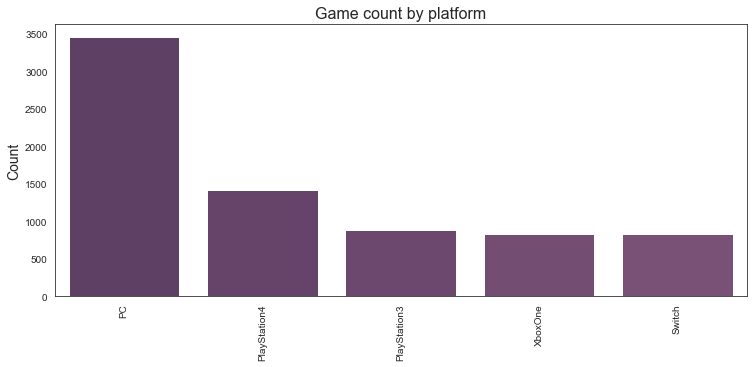

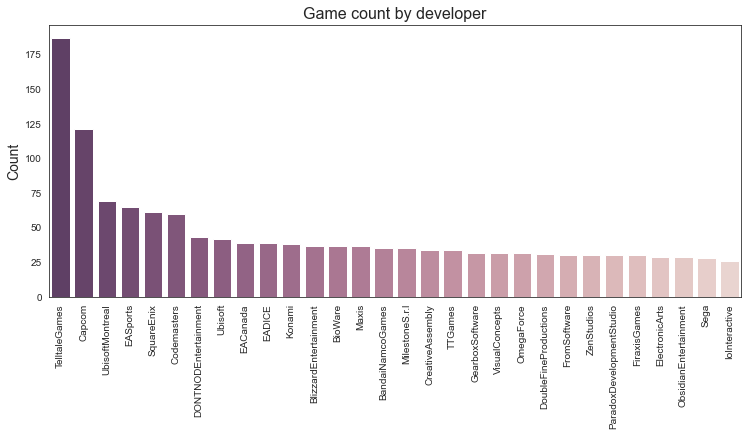

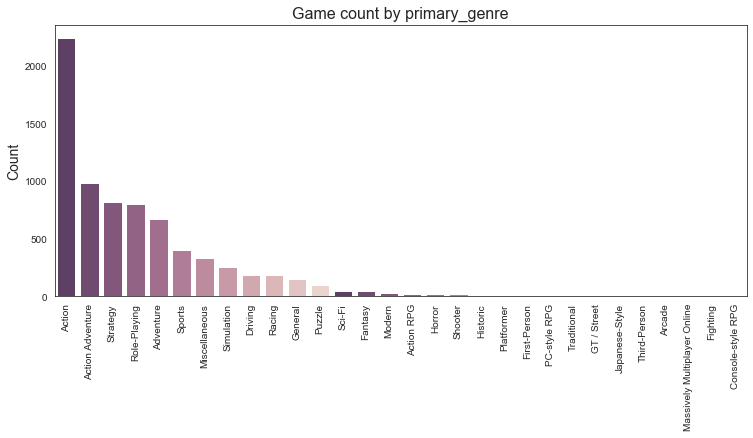

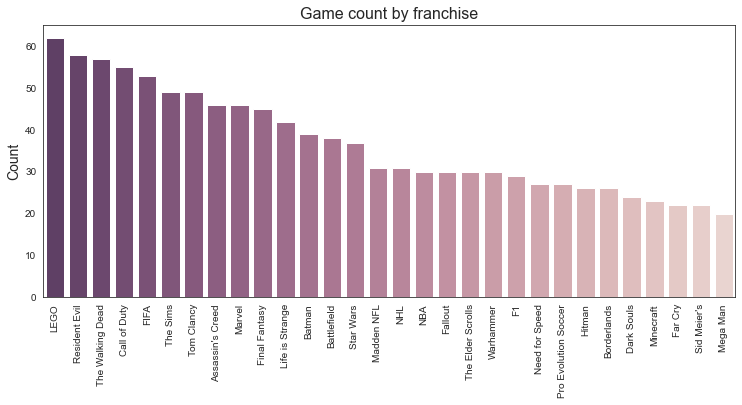

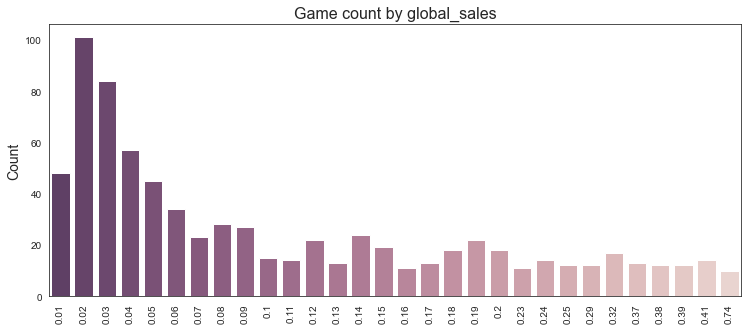

In [52]:
cols = ['platform', 'developer', 'primary_genre', 'franchise', 'global_sales'] 

for col in cols:
    chart = vg_df[['title', col]].groupby([col]).count().sort_values('title', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='title', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'primary_genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')
    plt.show()

# Sales vs Critic Scores

In [53]:
def score_group(score):
    if score >= 90:
        return '90-100'
    elif score >= 80:
        return '80-89'
    elif score >= 70:
        return '70-79'
    elif score >= 60:
        return '60-69'
    elif score >= 50:
        return '50-59'
    else:
        return '0-49'

In [54]:
score_df = vg_df.dropna(subset=['score']).reset_index(drop=True)
score_df['score_group'] = score_df['score'].apply(lambda x: score_group(x))

In [55]:
score_df.head()

,title,platform,release-date,score,user_score,developer,genre,primary_genre,critics,users,franchise,global_sales,score_group
0,.hack//G.U. Last Recode,PlayStation4,3-Nov-17,76,8.1,CyberConnect2,"Miscellaneous,Compilation",Miscellaneous,21,64,hack,0.47,70-79
1,.hack//G.U. Last Recode,PC,3-Nov-17,69,8.0,CyberConnect2,"Miscellaneous,Compilation",Miscellaneous,7,25,hack,NaN,60-69
2,#IDARB,XboxOne,30-Jan-15,77,6.9,OtherOceanInteractive,"Action,General",Action,31,88,#IDARB,0.09,70-79
3,007: Quantum of Solace,PlayStation3,4-Nov-08,65,6.6,Treyarch,"Action,General,Shooter,Shooter,First-Person,Mo...",Action,42,59,007: Quantum of Solace,1.14,60-69
4,007: Quantum of Solace,PC,4-Nov-08,70,6.1,"Treyarch,Beenox","Action,General,Shooter,Shooter,First-Person,Mo...",Action,18,64,007: Quantum of Solace,0.03,70-79


In [56]:
def in_top(x):
    if x in pack:
        return x
    else:
        pass
def width(x):
    if x == 'platform':
        return 14.4
    elif x == 'developer':
        return 13.2
    elif x == 'genre':
        return 13.6

def height(x):
    if x == 'genre':
        return 8
    else:
        return 9

In [57]:
franchise = pd.get_dummies(vg_df['franchise'])

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

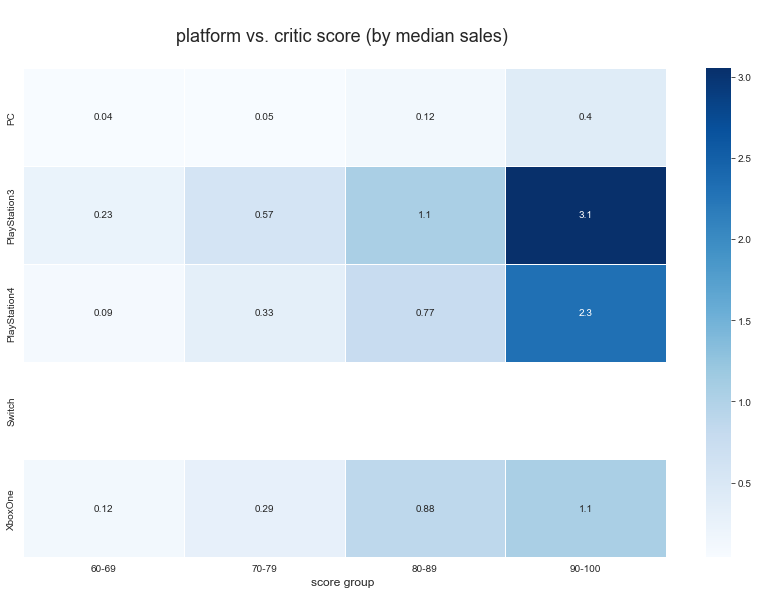

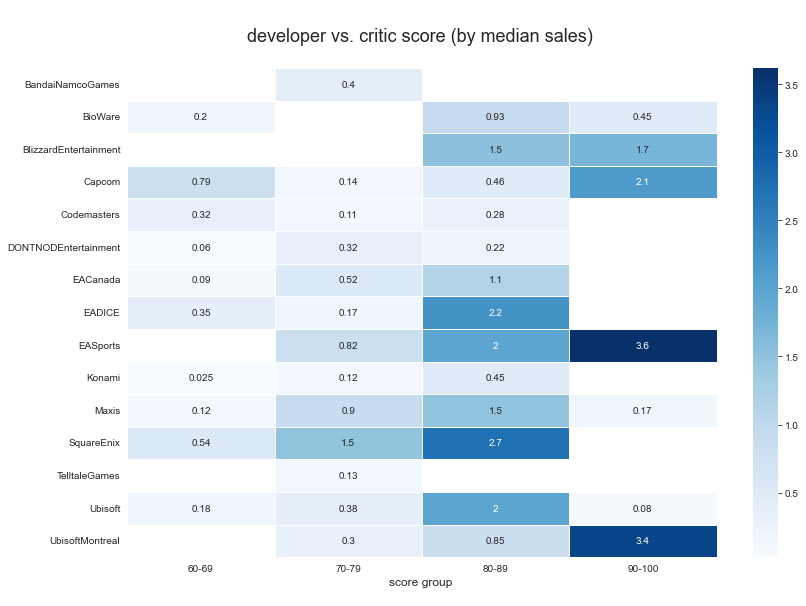

In [58]:
cols = ['platform', 'developer', 'primary_genre', 'franchise']
for col in cols:
    pack = []
    top = score_df[['title', col]].groupby([col]).count().sort_values('title', ascending=False).reset_index()[:15]
    for x in top[col]:
        pack.append(x)
    score_df[col] = score_df[col].apply(lambda x: in_top(x))
    score_df_platform = score_df[[col, 'score_group', 'global_sales']].groupby([col, 'score_group']).median().reset_index().pivot(col, "score_group", "global_sales")
    plt.figure(figsize=(width(col), height(col)))
    sns.heatmap(score_df_platform, cmap="Blues", annot=True, fmt=".2g", linewidths=.5).set_title((' \n'+col+' vs. critic score (by median sales) \n'), fontsize=18)
    plt.ylabel('', fontsize=14)
    plt.xlabel('score group \n', fontsize=12)
    pack = []

# Dataset Correlations

In [65]:
cols = ['platform', 'genre', 'developer', 'score', 'user_score']
for col in cols:
    uniques = vg_df[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        df.loc[df[col] == k, col] = v

In [67]:
df1 = pd.get_dummies(vg_df[['platform','primary_genre','score', 'global_sales']])
df1 = df1.dropna().reset_index(drop=True)
df1 = df1.astype('float64')

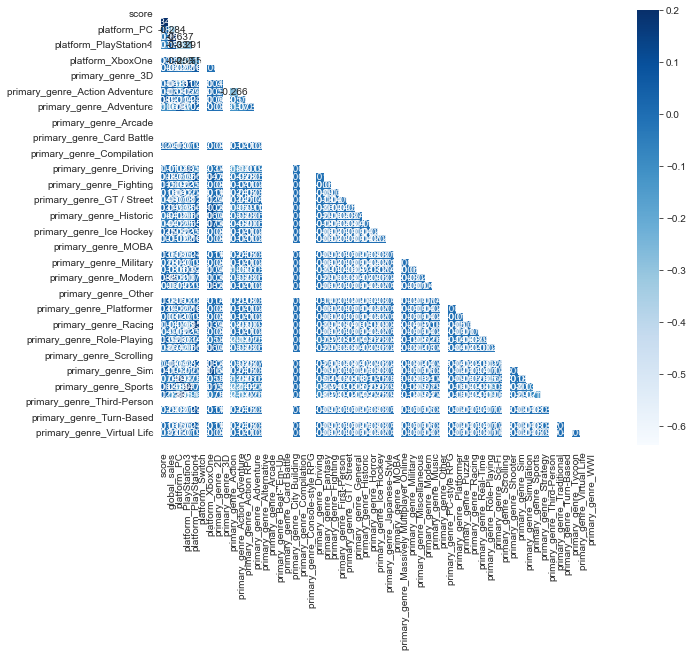

In [68]:
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(730, 300, sep=20, as_cmap=True, s=85, l=15, n=20) # note: 680, 350/470
with sns.axes_style("white"):
    fig, ax = plt.subplots(1,1, figsize=(15,8))
    ax = sns.heatmap(df1.corr(), mask=mask, vmax=0.2, square=True, annot=True, fmt=".3f", cmap="Blues")

AttributeError: 'DataFrame' object has no attribute 'release'

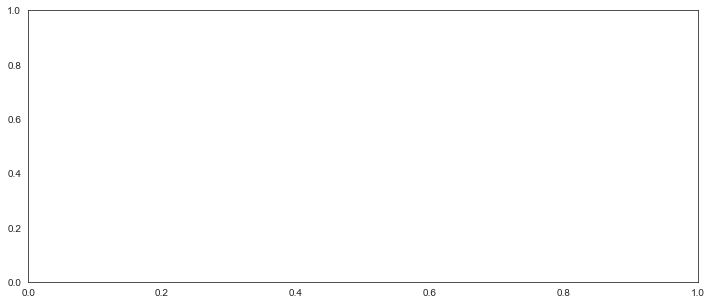

In [69]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="score", y="global_sales", data=df1.loc[df1.release-date >= 2014],
            truncate=True, x_bins=15, color="#75556c").set(ylim=(0, 4), xlim=(50, 95))

# Defining Hits

# Prediction Model

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
# from sklearn import svm

In [ ]:
# # Generate features
# df2.head()

In [ ]:
# from pandas import get_dummies
# df_copy = pd.get_dummies(df2)
# df_copy.head()

In [ ]:
# df3 = df_copy
# y = df3['Hit'].values
# df3 = df3.drop(['Hit'],axis=1)
# X = df3.values

In [ ]:
# Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50, random_state=2)

In [ ]:
# radm = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
# y_val_1 = radm.predict_proba(Xtest)
# print("Validation accuracy: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values
#                                    == ytest)/len(ytest))

In [ ]:
# log_reg = LogisticRegression().fit(Xtrain, ytrain)
# y_val_2 = log_reg.predict_proba(Xtest)
# print("Validation accuracy: ", sum(pd.DataFrame(y_val_2).idxmax(axis=1).values
#                                    == ytest)/len(ytest))

In [ ]:
# all_predictions = log_reg.predict(Xtest)
# print(classification_report(ytest, all_predictions))

In [ ]:
# fig, ax = plt.subplots(figsize=(3.5,2.5))
# sns.heatmap(confusion_matrix(ytest, all_predictions), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
# sns.plt.title('Training Set Confusion Matrix')

In [ ]:
# indices = np.argsort(radm.feature_importances_)[::-1]

# # Print the feature ranking
# print('Feature ranking (top 10):')

# for f in range(10):
#     print('%d. feature %d %s (%f)' % (f+1 , indices[f], df3.columns[indices[f]],
#                                       radm.feature_importances_[indices[f]]))

# Top Hits

In [ ]:
not_hit_copy = df_copy[df_copy['Hit'] == 0]

In [ ]:
df4 = not_hit_copy
y = df4['Hit'].values
df4 = df4.drop(['Hit'],axis=1)
X = df4.values

In [ ]:
pred = log_reg.predict_proba(X)

In [ ]:
dfb = dfb[dfb['Global_Sales'] < 1]

In [ ]:
dfb['Hit_Probability'] = pred[:,1]

In [ ]:
dfb = dfb[dfb['Year_of_Release'] == 2016]
dfb.sort_values(['Hit_Probability'], ascending=[False], inplace=True)
dfb = dfb[['Name', 'Platform', 'Hit_Probability']]

In [ ]:
dfb[:10].reset_index(drop=True)

In [ ]:
dfb[:-11:-1].reset_index(drop=True)